### P-266 Resume Classification
#### Business objective:
*The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention*

In [1]:
!pip install pywin32
!pip install pdf2docx
!pip3 install -U spacy
!pip install textblob
!pip install docx2txt
!pip install wordcloud

In [2]:
import os
import re
import nltk
nltk.download()
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib import pylab
from matplotlib import pyplot as plt

nltk.download('punkt')

import os.path
import win32com.client
from pdf2docx import Converter
import docx2txt
from textblob import TextBlob, Word
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91966\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
os.listdir("D:\ExcelR\DS- Project\P-266\Resumes-20220812T140008Z-001 (1)")

['Resumes']

In [4]:
# User-Defined function to convert a doc file to docx file
def convert_doctodocx(baseDir):
    #print(baseDir)
    word = win32com.client.Dispatch("Word.application")
    for dir_path, dirs, files in os.walk(baseDir):
        for file_name in files:
            file_path = os.path.join(dir_path, file_name)
            #print(file_path)
            file_name, file_extension = os.path.splitext(file_path)
            if "~$" not in file_name:
                if file_extension.lower() == '.doc': #
                    docx_file = '{0}{1}'.format(file_path, 'x')
                    if not os.path.isfile(docx_file): # Skip conversion where docx file already exists
                        file_path = os.path.abspath(file_path)
                        docx_file = os.path.abspath(docx_file)
                        try:
                            wordDoc = word.Documents.Open(file_path)
                            wordDoc.SaveAs2(docx_file, FileFormat = 16)
                            wordDoc.Close()
                        except Exception as e:
                            print('Failed to Convert: {0}'.format(file_path))
                            print(e)

In [5]:
file_path1 = []
category1  = []
directory1 = "D:\ExcelR\DS- Project\P-266\Resumes-20220812T140008Z-001 (1)\Resumes\Peoplesoft resumes"
convert_doctodocx(directory1)
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [6]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Cat1'] = category1
data1

,Raw_Details,Cat1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
6,PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...,PeopleSoft
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
8,Vinod Akkala ...,PeopleSoft
9,PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...,PeopleSoft


In [7]:
file_path2 = []
category2  = []
directory2 = "D:\ExcelR\DS- Project\P-266\Resumes-20220812T140008Z-001 (1)\Resumes\SQL Developer Lightning insight"
convert_doctodocx(directory2)
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('SQL Developer')

In [8]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Cat2'] = category2
data2

,Raw_Details,Cat2
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4, Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...,SQL Developer
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
7,SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L ...,SQL Developer
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer


In [9]:
file_path3 = []
category3  = []
directory3 = "D:\ExcelR\DS- Project\P-266\Resumes-20220812T140008Z-001 (1)\Resumes\workday resumes"
convert_doctodocx(directory3)
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('Workday')

In [10]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Cat3'] = category3
data3

,Raw_Details,Cat3
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,Workday
3,Harikrishna Akula ...,Workday
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,Workday
5,G Himaja\n\n ...,Workday
6,Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...,Workday
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
8,Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...,Workday
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday


In [19]:
# Converting pdf files to docx
path = "D:\ExcelR\DS- Project\P-266\Resumes-20220812T140008Z-001 (1)\Resumes\React Developer"
for file in os.listdir(path):
    if file.endswith('.pdf'):
        final = os.path.join(path, file)
        cv = Converter(final)
        basename = os.path.splitext(file)[0]
        print(basename)
        cv.convert(path + '/' + basename+'1.docx', start=0, end=None)
        cv.close()

[INFO] Start to convert D:\ExcelR\DS- Project\P-266\Resumes-20220812T140008Z-001 (1)\Resumes\React Developer\Reactjs Developer_Prabakaran_Musquare Technologies.pdf
[INFO] [1/4] Opening document...
[INFO] [2/4] Analyzing document...


Reactjs Developer_Prabakaran_Musquare Technologies


[INFO] [3/4] Parsing pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] [4/4] Creating pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] Terminated in 0.94s.


In [20]:
file_path4 = []
category4  = []
directory4 = "D:\ExcelR\DS- Project\P-266\Resumes-20220812T140008Z-001 (1)\Resumes\React Developer"
convert_doctodocx(directory4)
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('React js developer')

In [21]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Cat4'] = category4
data4

,Raw_Details,Cat4
0,Name: Ravali P \n\n\n\n ...,React js developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,React js developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React js developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React js developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React js developer
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React js developer
6,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React js developer
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React js developer
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React js developer
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React js developer


In [22]:
# Creating Resume Dataframe
resume_df = data1.append([data2, data3, data4], ignore_index = True)
resume_df

,Raw_Details,Cat1,Cat2,Cat3,Cat4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft,NaN,NaN,NaN
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft,NaN,NaN,NaN
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft,NaN,NaN,NaN
...,...,...,...,...,...
74,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,NaN,NaN,NaN,React js developer
75,Name: M. Prabakaran \nTitle: UI Developer\n\nP...,NaN,NaN,NaN,React js developer
76,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,NaN,NaN,NaN,React js developer
77,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,NaN,NaN,NaN,React js developer


In [23]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Cat1         20 non-null     object
 2   Cat2         14 non-null     object
 3   Cat3         21 non-null     object
 4   Cat4         24 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [24]:
#Creating a new feature by adding all other features
resume_df['Cat'] = category1 + category2 + category3 + category4
resume_df

,Raw_Details,Cat1,Cat2,Cat3,Cat4,Cat
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...
74,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,NaN,NaN,NaN,React js developer,React js developer
75,Name: M. Prabakaran \nTitle: UI Developer\n\nP...,NaN,NaN,NaN,React js developer,React js developer
76,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,NaN,NaN,NaN,React js developer,React js developer
77,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,NaN,NaN,NaN,React js developer,React js developer


In [25]:
#Dropping other features
resume_df.drop(['Cat1', 'Cat1', 'Cat1', 'Cat1'], axis = 1, inplace = True)
resume_df = resume_df[["Cat", "Raw_Details"]]

In [18]:
resume_df.head()

,Cat,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \..."


In [26]:
resume_df.shape

(79, 2)

In [20]:
#Creating CSV File
resume_df.to_csv('All_Resumes.csv', index=False)

In [21]:
resume_df = pd.read_csv("All_Resumes.csv")
resume_df

,Cat,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \..."
...,...,...
74,React js developer,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...
75,React js developer,Name: M. Prabakaran \nTitle: UI Developer\n\nP...
76,React js developer,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...
77,React js developer,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...


In [22]:
resume_df["Raw_Details"][4]

'Priyanka Ramadoss\n\n\t61/46, MountPleasant, \n\n\tCoonoor\n\n\tThe Nilgiris- 643102                                                                                            \n\n\t\n\nCareer Objective\n\n\n\nTo excel as a software professional by working in a learning and challenging environment and utilize the skills and knowledge through diligence, dedication and ensure maximum contribution to the growth of the organization I work for.\n\n\t\n\nProfile Summary\n\n\n\nAn Adept IT professional with 4.11 years (September 2016 - present) of experience as Peoplesoft Admin with Accenture\n\n\t\n\nProfessional Summary\n\n\n\nPeopleSoft Administrator (September 2016-Present)\n\n\n\nExperience in PeopleSoft Administration for Finance application.\n\nProficient in creating and configuring PeopleSoft components like Web server, Application server and process schedulers.\n\nActive monitoring in Non production databases and applications.\n\nKnowledgeable on PeopleSoft migrations using applicat

In [23]:
resume_df.isnull().sum()

Cat            0
Raw_Details    0
dtype: int64

### Words in resumes

In [24]:
resume_df['Word_Count'] = resume_df['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_df[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
1,G. Ananda Rayudu \n\n\t\t https://www.li...,1441
2,PeopleSoft Database Administrator\n\n ...,1346
3,Classification: Internal\n\nClassification: In...,558
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",667


### Charactors in resumes

In [25]:
resume_df['Char_Count'] = resume_df['Raw_Details'].str.len() ## this also includes spaces
resume_df[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,G. Ananda Rayudu \n\n\t\t https://www.li...,8318
2,PeopleSoft Database Administrator\n\n ...,6900
3,Classification: Internal\n\nClassification: In...,4917
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",5196


### Stopwords in resumes

In [26]:
stop = stopwords.words('english')
resume_df['Stopwords'] = resume_df['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_df[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,G. Ananda Rayudu \n\n\t\t https://www.li...,186
2,PeopleSoft Database Administrator\n\n ...,177
3,Classification: Internal\n\nClassification: In...,114
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",123


### Numerics in resumes

In [27]:
resume_df['Numerics'] = resume_df['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_df[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,G. Ananda Rayudu \n\n\t\t https://www.li...,6
2,PeopleSoft Database Administrator\n\n ...,4
3,Classification: Internal\n\nClassification: In...,7
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",7


In [28]:
resume_df

,Cat,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...,1441,8318,186,6
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...,1346,6900,177,4
3,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",667,5196,123,7
...,...,...,...,...,...,...
74,React js developer,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,777,3273,70,5
75,React js developer,Name: M. Prabakaran \nTitle: UI Developer\n\nP...,305,2699,60,8
76,React js developer,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,194,1773,51,8
77,React js developer,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,435,3299,86,4


### Text Preprocessing

In [29]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [30]:
resume_data = pd.read_csv('all_Resumes.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

In [31]:
resume_data

,Cat,Raw_Details,Resume_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...,ananda rayudu profile summary years experience...
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,React js developer,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,khizaruddin rauf experience currently working ...
75,React js developer,Name: M. Prabakaran \nTitle: UI Developer\n\nP...,name prabakaran title developer professional s...
76,React js developer,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,pranish sonone career summary experience years...
77,React js developer,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,ranga gaganam professional summary professiona...


### Clean data new CSV

In [32]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Cat,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,React js developer,khizaruddin rauf experience currently working ...
75,React js developer,name prabakaran title developer professional s...
76,React js developer,pranish sonone career summary experience years...
77,React js developer,ranga gaganam professional summary professiona...


In [33]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [34]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Cat,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,React js developer,khizaruddin rauf experience currently working ...
75,React js developer,name prabakaran title developer professional s...
76,React js developer,pranish sonone career summary experience years...
77,React js developer,ranga gaganam professional summary professiona...


In [35]:
resume_data.Resume_Details[5]

'sirazuddin bangalore india sirazuddin bangalore india profile summary overall years experience peoplesoft administrator installed peopletools scratch including products experience peopletools application hrms fscm deterministic approach towards problem solving troubleshooting proficient integration broker upgraded fscm hcm applications peopletools peopletools education graduated tech electronics communication engg college engineering vizianagaram jntuk aggregate achieved marks standard scored standard achievements awarded bravo pat back techahindra awarded associate month award innovator month time awarded spot pat back capgemini work experience capgemini may till production support finance environment respective non production environments project experience project name axa role consultant environment windows server cognizant technol ogy sol ions augus april voya financial insurance client project deals support managing finance applications project experience project name voya finan

### Named Entity Recognition

In [36]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('people', 160), ('technical', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 142), ('role', 142), ('environment', 139), ('developer', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


### Parts of Speech Tagging

In [37]:
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [38]:
for token in doc_block[:30]:
    print(token,token.pos_) 

d PROPN
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk PROPN
working VERB
knowledge NOUN
ansible ADJ
docker NOUN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting VERB
shell NOUN
script NOUN
failures NOUN
techmahindra PROPN
role PROPN
project NOUN
application NOUN
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft VERB
admin NOUN
skills NOUN


### Filtering out only the Nouns and Verbs from the Text to Tokens

In [39]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'managing', 'production', 'environments', 'support', 'environments', 'installed', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requirement', 'reviewing', 'vulne

### Counting all the Nouns and Verbs present in the Tokens of words

In [40]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,544
1,application,417
2,using,384
3,workday,353
4,reports,326
5,data,307
6,project,289
7,business,260
8,server,243
9,web,237


### Visualizing the Result of Top 20 Nouns and Verbs most Frequently

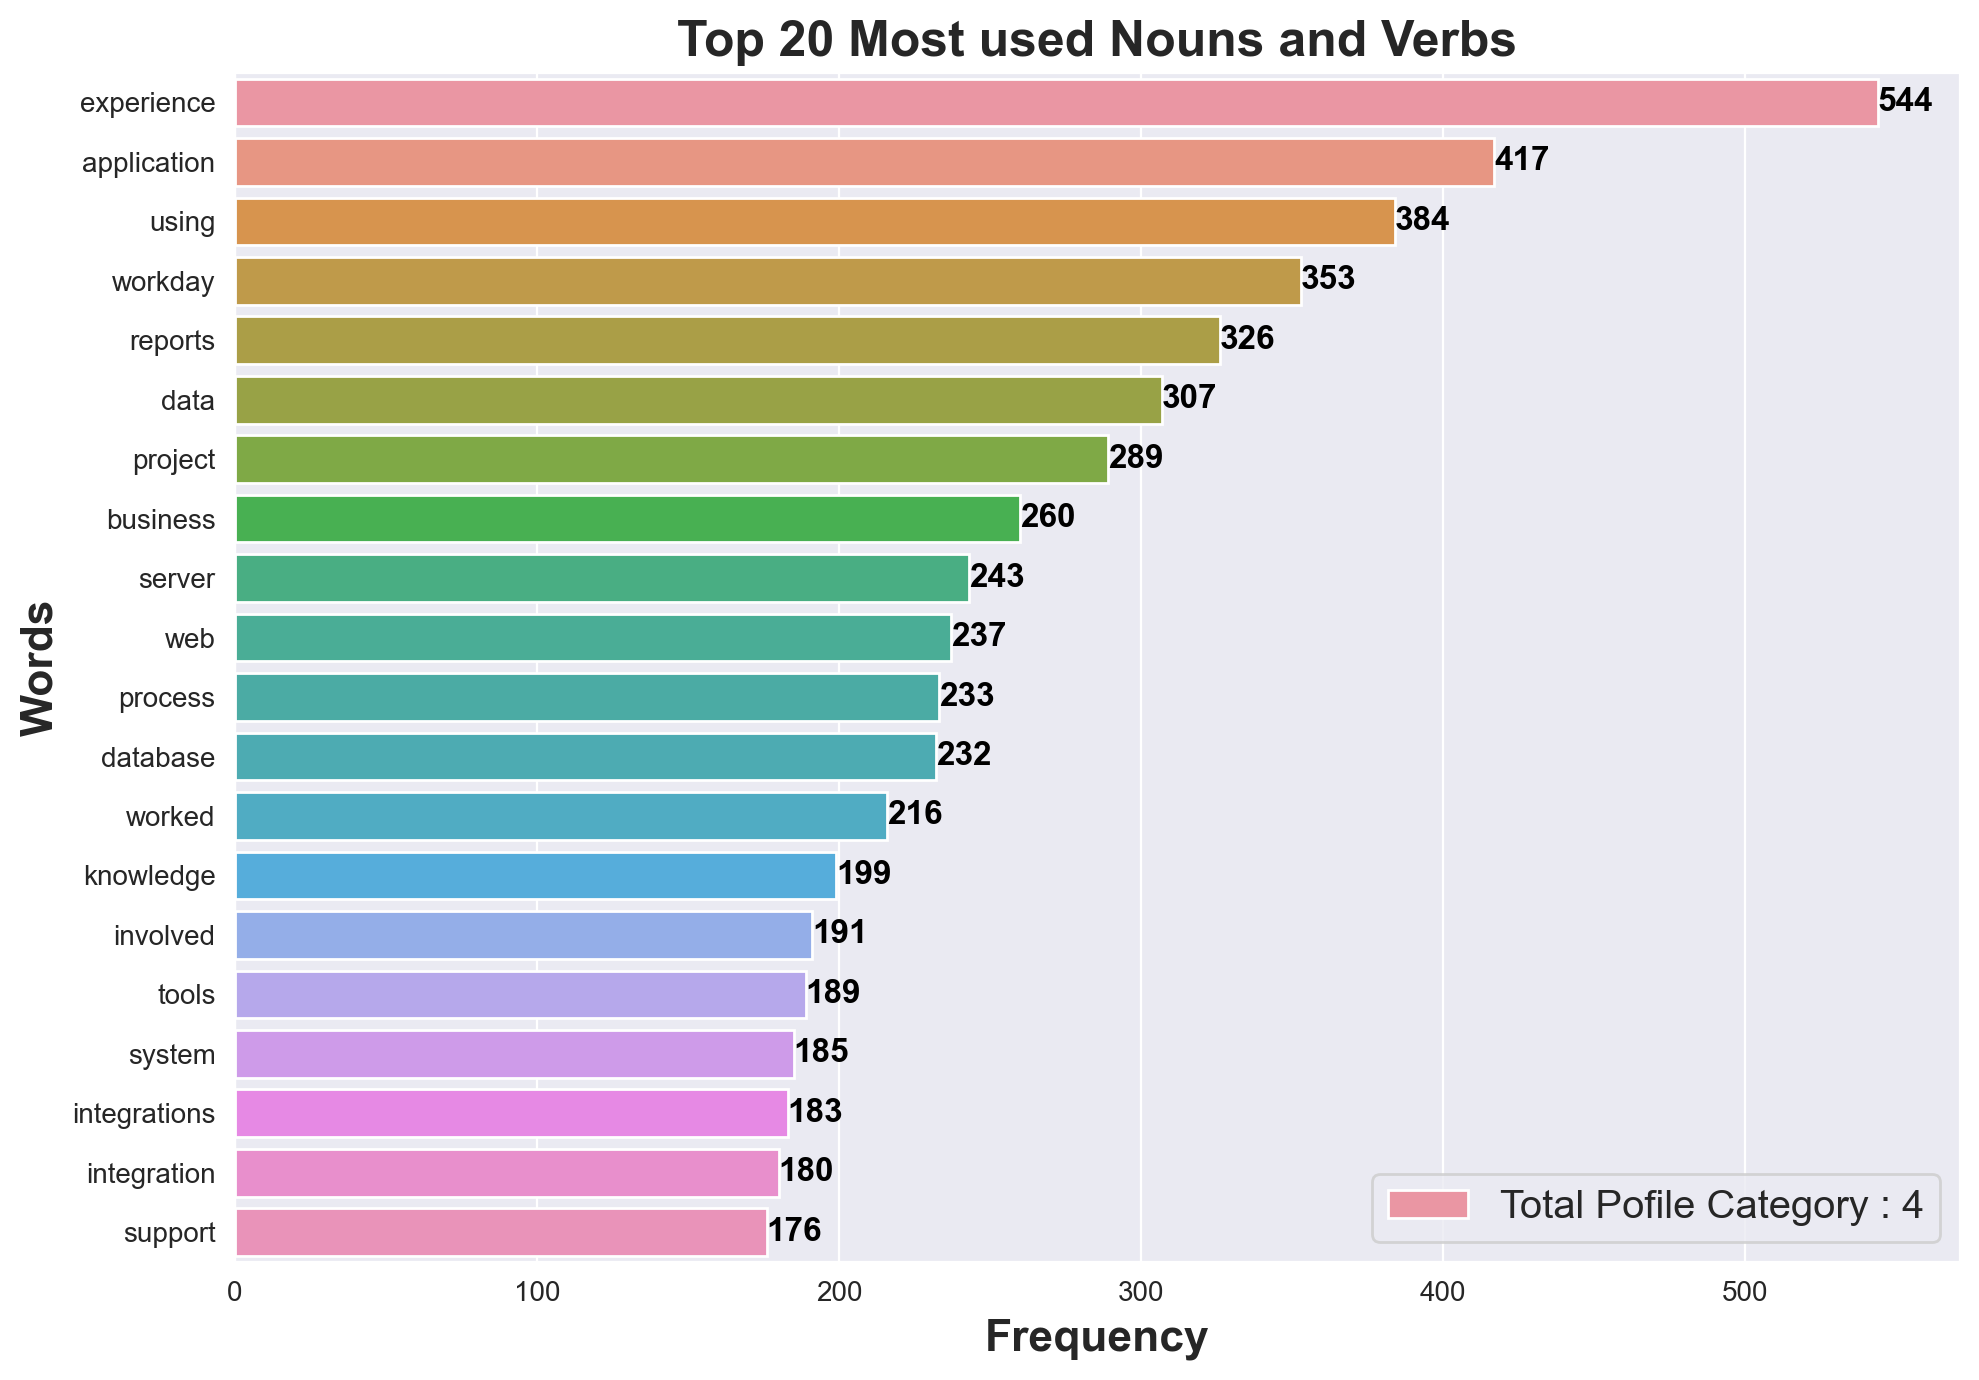

In [41]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Cat.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 20 Most used Nouns and Verbs', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

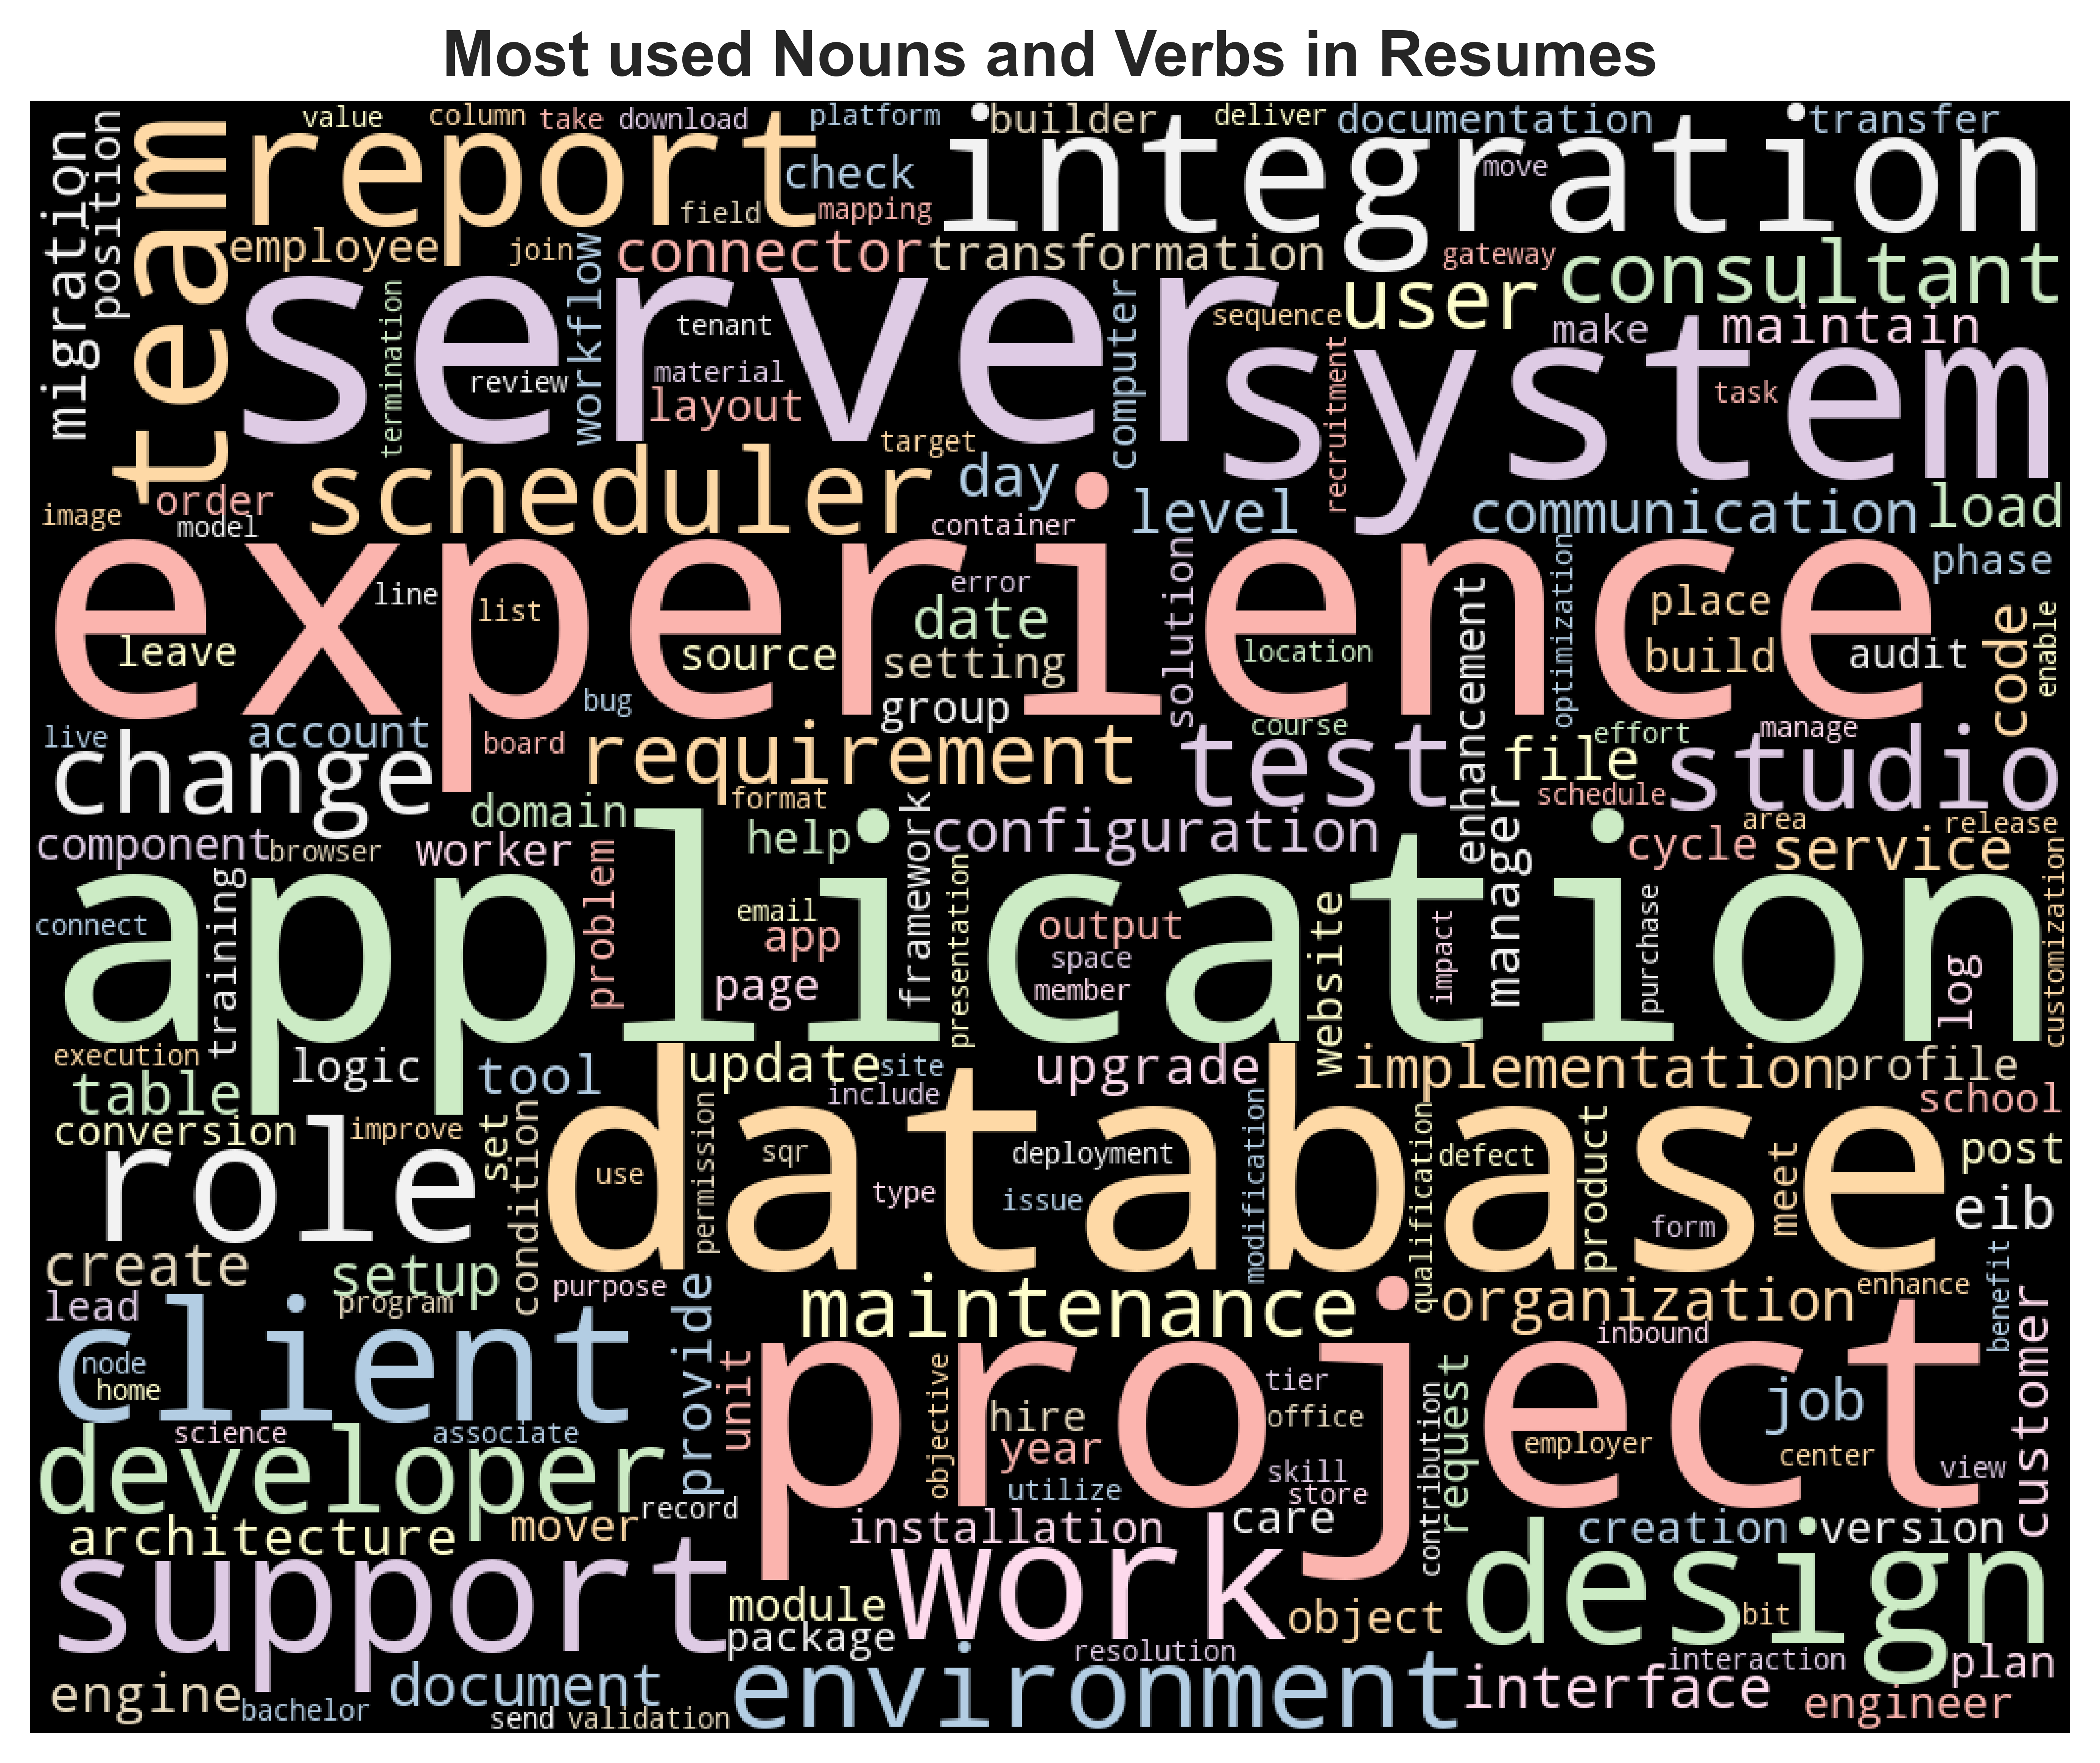

In [42]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

plt.show()

### Exploratory Data Analysis (EDA)

In [43]:
file_path   = r'Resume Dataset/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)


In [44]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [45]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


In [46]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

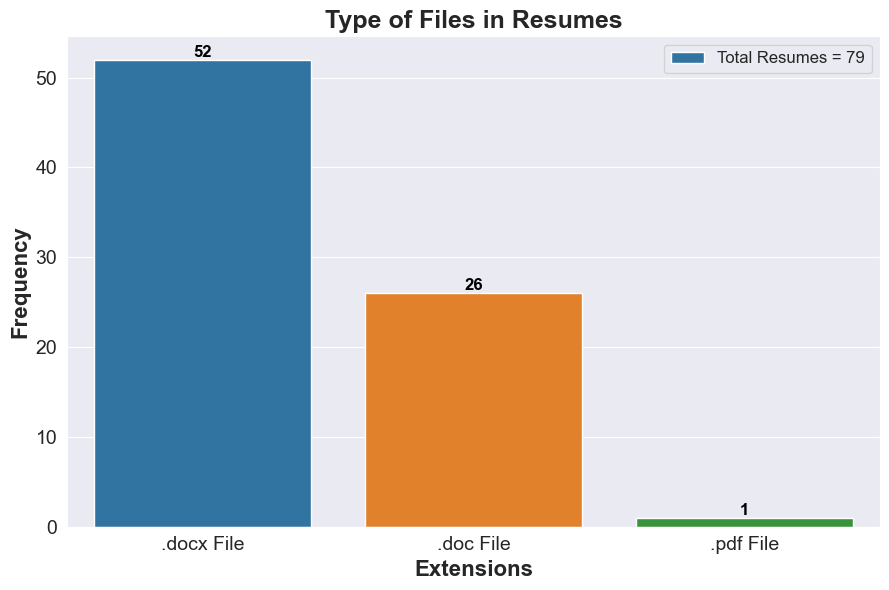

In [47]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)],
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

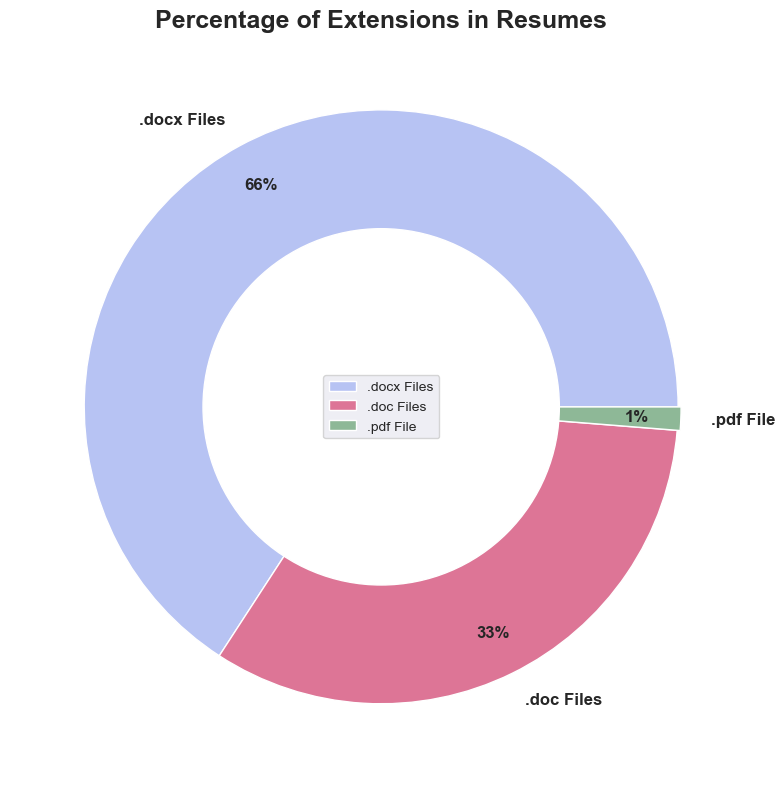

In [48]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
#colors = ['#eba134', '#1466d9', '#706e70']
colors = ['#B7C3F3','#DD7596','#8EB897']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85, 
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### Extract Resumes by Profile

In [49]:
file_path = r'Resume Dataset/'
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [50]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resume Dataset'] = file_name
resume_data

,Profile,Resume Dataset
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.doc
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.doc
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.doc
...,...,...
74,workday resumes,Sri Krishna S_Hexaware.doc
75,workday resumes,Srikanth-Hexaware.docx
76,workday resumes,SSKumar_Hexaware.docx
77,workday resumes,Venkateswarlu B_Hexaware.doc


In [51]:
resume_data.Profile.value_counts().index

Index(['React js developer', 'workday resumes', 'Peoplesoft resumes',
       'SQL Developer Lightning insight'],
      dtype='object')

In [52]:
resume_data.Profile.value_counts()

React js developer                 24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: Profile, dtype: int64

### Number of resumes and profile in dataset

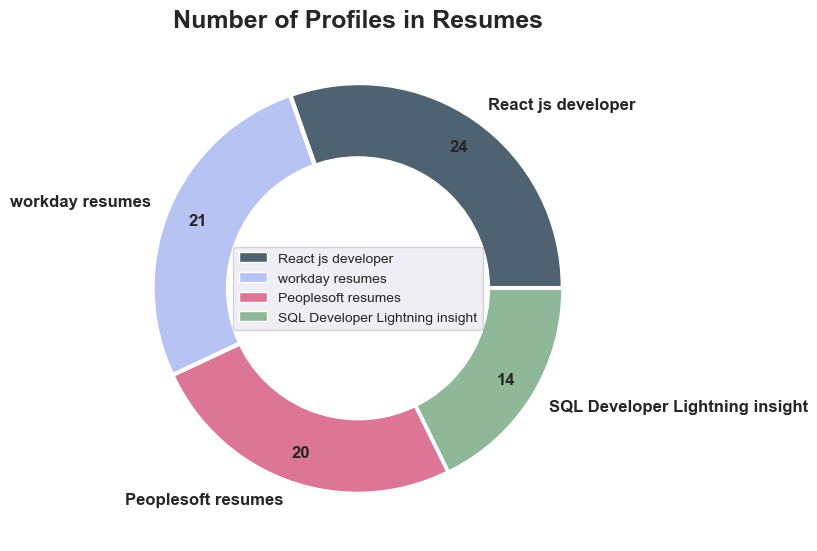

In [53]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'] 
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.65, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

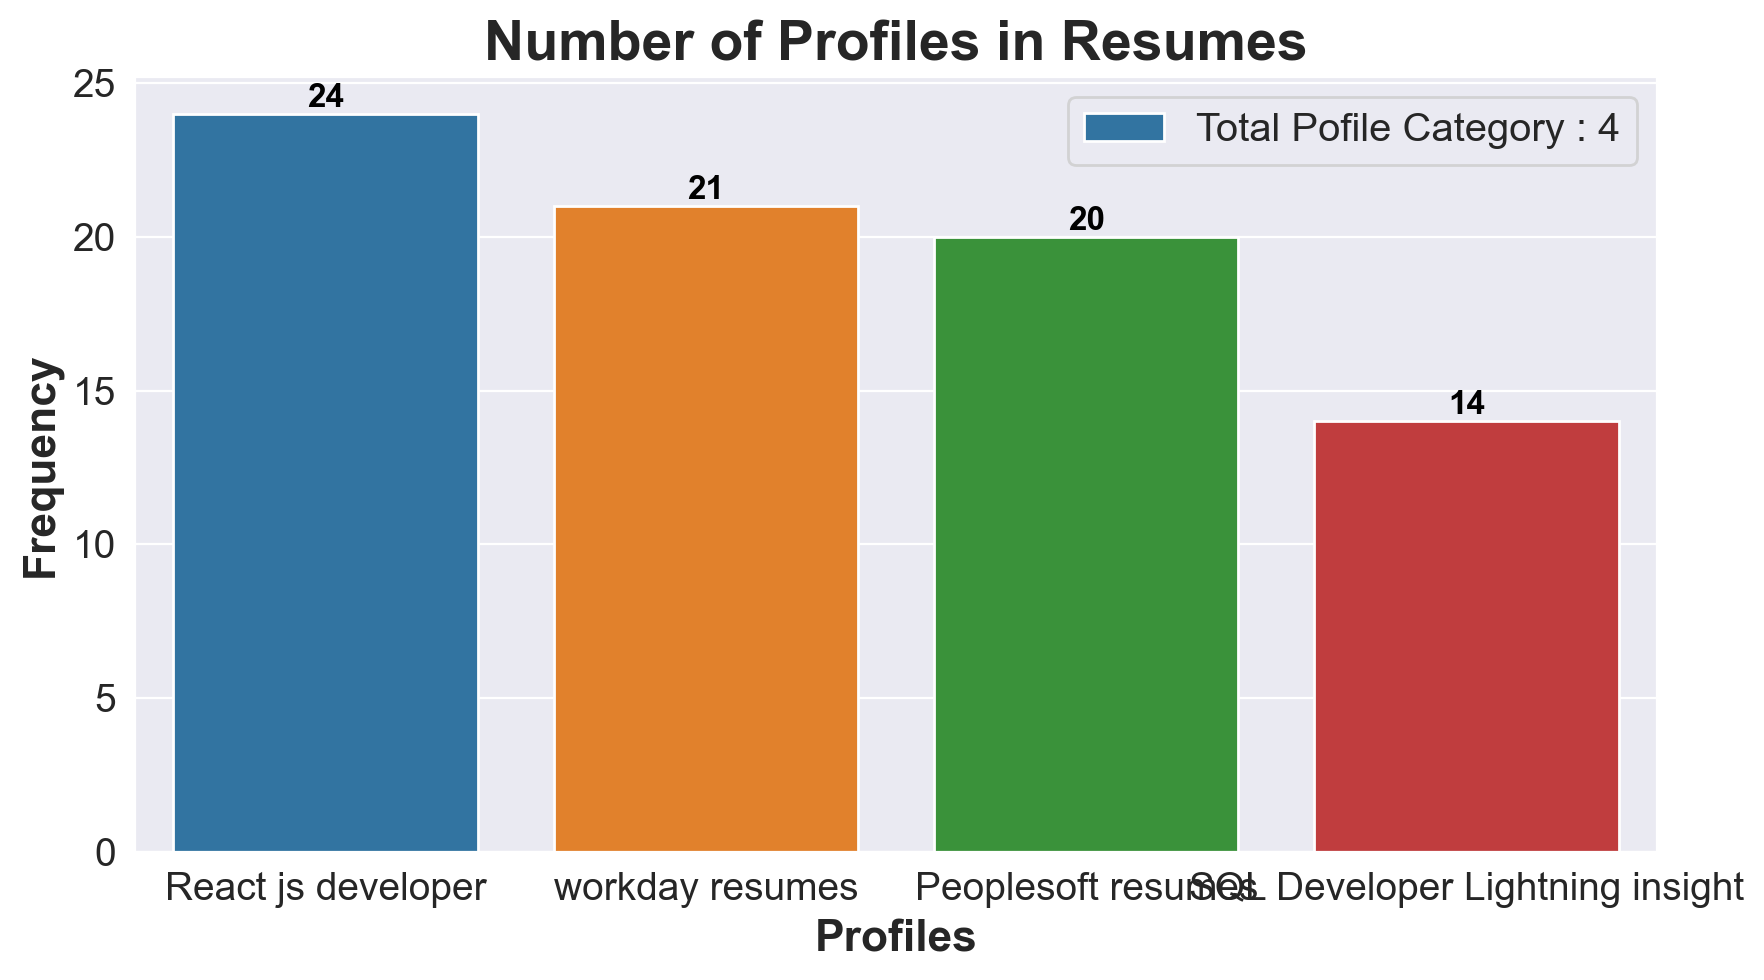

In [54]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= resume_data.Profile.value_counts().index, y= resume_data.Profile.value_counts(),
                 data= resume_data, ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Profile.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### Percentage of Profiles Category

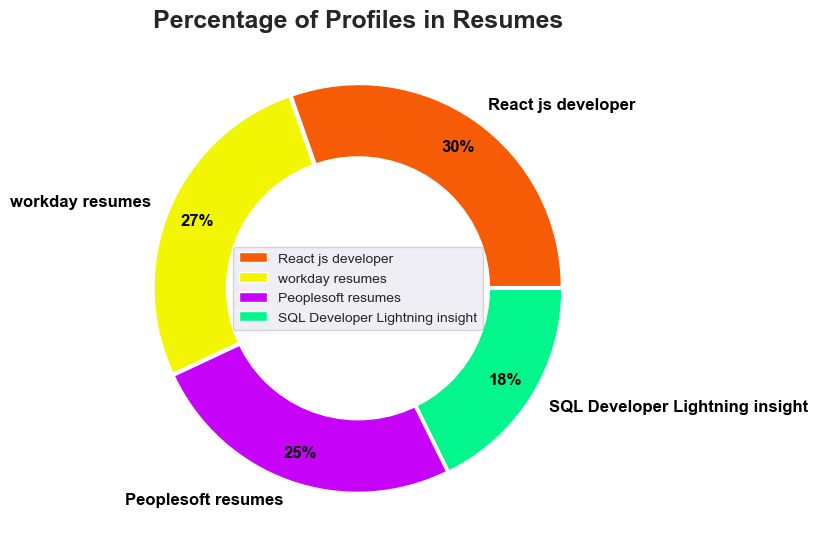

In [55]:
fig = plt.figure(figsize=(8,8),dpi=100) 

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B05', '#F2F602', '#C603F8', '#03F68C']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode, 
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.65, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### Reading a Resume File

In [56]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx('Resumes\React js developer\React Developer_Naveen sadhu.docx'))

Naveen Sadhu





Title: software developer                      

Location: Hyderabad, India                                   



Professional Summary

1 year of overall IT experience in Html, Sql, Reactjs and Nodejs.

Experience in working with Application development and testing tool

Hard working and enthusiastic.

 Excellent communication, interpersonal, analytical skills, and strong ability to perform as part of team.

Exceptional ability to learn new concepts.

 

Education

 Bachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Institute of Technology and Management (Affiliated to JNTUH).

Skills

Technology

MERN stack

Frameworks

Framework7

IDEs

Eclipse, Visual Studio Code

Databases

SQL, Mongo Database

Operating Systems

Windows, Unix 



Professional Experience

Current Project 

Client    : Inline4, USA



Organization     : Edvenswa tech Pvt. Ltd



Technology   : MERN stack, HTML,CSS,BOOTSTRAP



Description



The project goal is to pr

### Data Exploration

In [29]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Cat,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,React js developer,khizaruddin rauf experience currently working ...
75,React js developer,name prabakaran title developer professional s...
76,React js developer,pranish sonone career summary experience years...
77,React js developer,ranga gaganam professional summary professiona...


### N-grams

- N-grams analyses are often used to see which words often show up together.

In [30]:
resume_data.head(0)

,Cat,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...


In [58]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['ananda']),
 WordList(['rayudu']),
 WordList(['profile']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['implementing']),
 WordList(['upgrading']),
 WordList(['supporting']),
 WordList(['peoplesoft']),
 WordList(['database']),
 WordList(['administration']),
 WordList(['including']),
 WordList(['human']),
 WordList(['capital']),
 WordList(['management']),
 WordList(['hcm']),
 WordList(['financials']),
 WordList(['campus']),
 WordList(['solutions'])]

In [59]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['ananda', 'rayudu']),
 WordList(['rayudu', 'profile']),
 WordList(['profile', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'implementing']),
 WordList(['implementing', 'upgrading']),
 WordList(['upgrading', 'supporting']),
 WordList(['supporting', 'peoplesoft']),
 WordList(['peoplesoft', 'database']),
 WordList(['database', 'administration']),
 WordList(['administration', 'including']),
 WordList(['including', 'human']),
 WordList(['human', 'capital']),
 WordList(['capital', 'management']),
 WordList(['management', 'hcm']),
 WordList(['hcm', 'financials']),
 WordList(['financials', 'campus']),
 WordList(['campus', 'solutions']),
 WordList(['solutions', 'portal'])]

In [60]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['ananda', 'rayudu', 'profile']),
 WordList(['rayudu', 'profile', 'summary']),
 WordList(['profile', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'implementing']),
 WordList(['experience', 'implementing', 'upgrading']),
 WordList(['implementing', 'upgrading', 'supporting']),
 WordList(['upgrading', 'supporting', 'peoplesoft']),
 WordList(['supporting', 'peoplesoft', 'database']),
 WordList(['peoplesoft', 'database', 'administration']),
 WordList(['database', 'administration', 'including']),
 WordList(['administration', 'including', 'human']),
 WordList(['including', 'human', 'capital']),
 WordList(['human', 'capital', 'management']),
 WordList(['capital', 'management', 'hcm']),
 WordList(['management', 'hcm', 'financials']),
 WordList(['hcm', 'financials', 'campus']),
 WordList(['financials', 'campus', 'solutions']),
 WordList(['campus', 'solutions', 'portal']),
 WordList(['solutions', 'portal', 'ihub'])]

In [61]:
resume_data['Resume_Details']

0     anubhav kumar singh core competencies scriptin...
1     ananda rayudu profile summary years experience...
2     peoplesoft database administrator gangareddy p...
3     classification internal classification interna...
4     priyanka ramadoss mountpleasant coonoor nilgir...
                            ...                        
74    khizaruddin rauf experience currently working ...
75    name prabakaran title developer professional s...
76    pranish sonone career summary experience years...
77    ranga gaganam professional summary professiona...
78    shaik abdul sharuk years experience wipro care...
Name: Resume_Details, Length: 79, dtype: object

### Top 20 most used words in Resumes
- Using CountVectorizer

In [62]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [63]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,598,experience
1,453,peoplesoft
2,431,workday
3,418,application
4,395,using
5,359,server
6,332,data
7,326,reports
8,326,project
9,280,sql


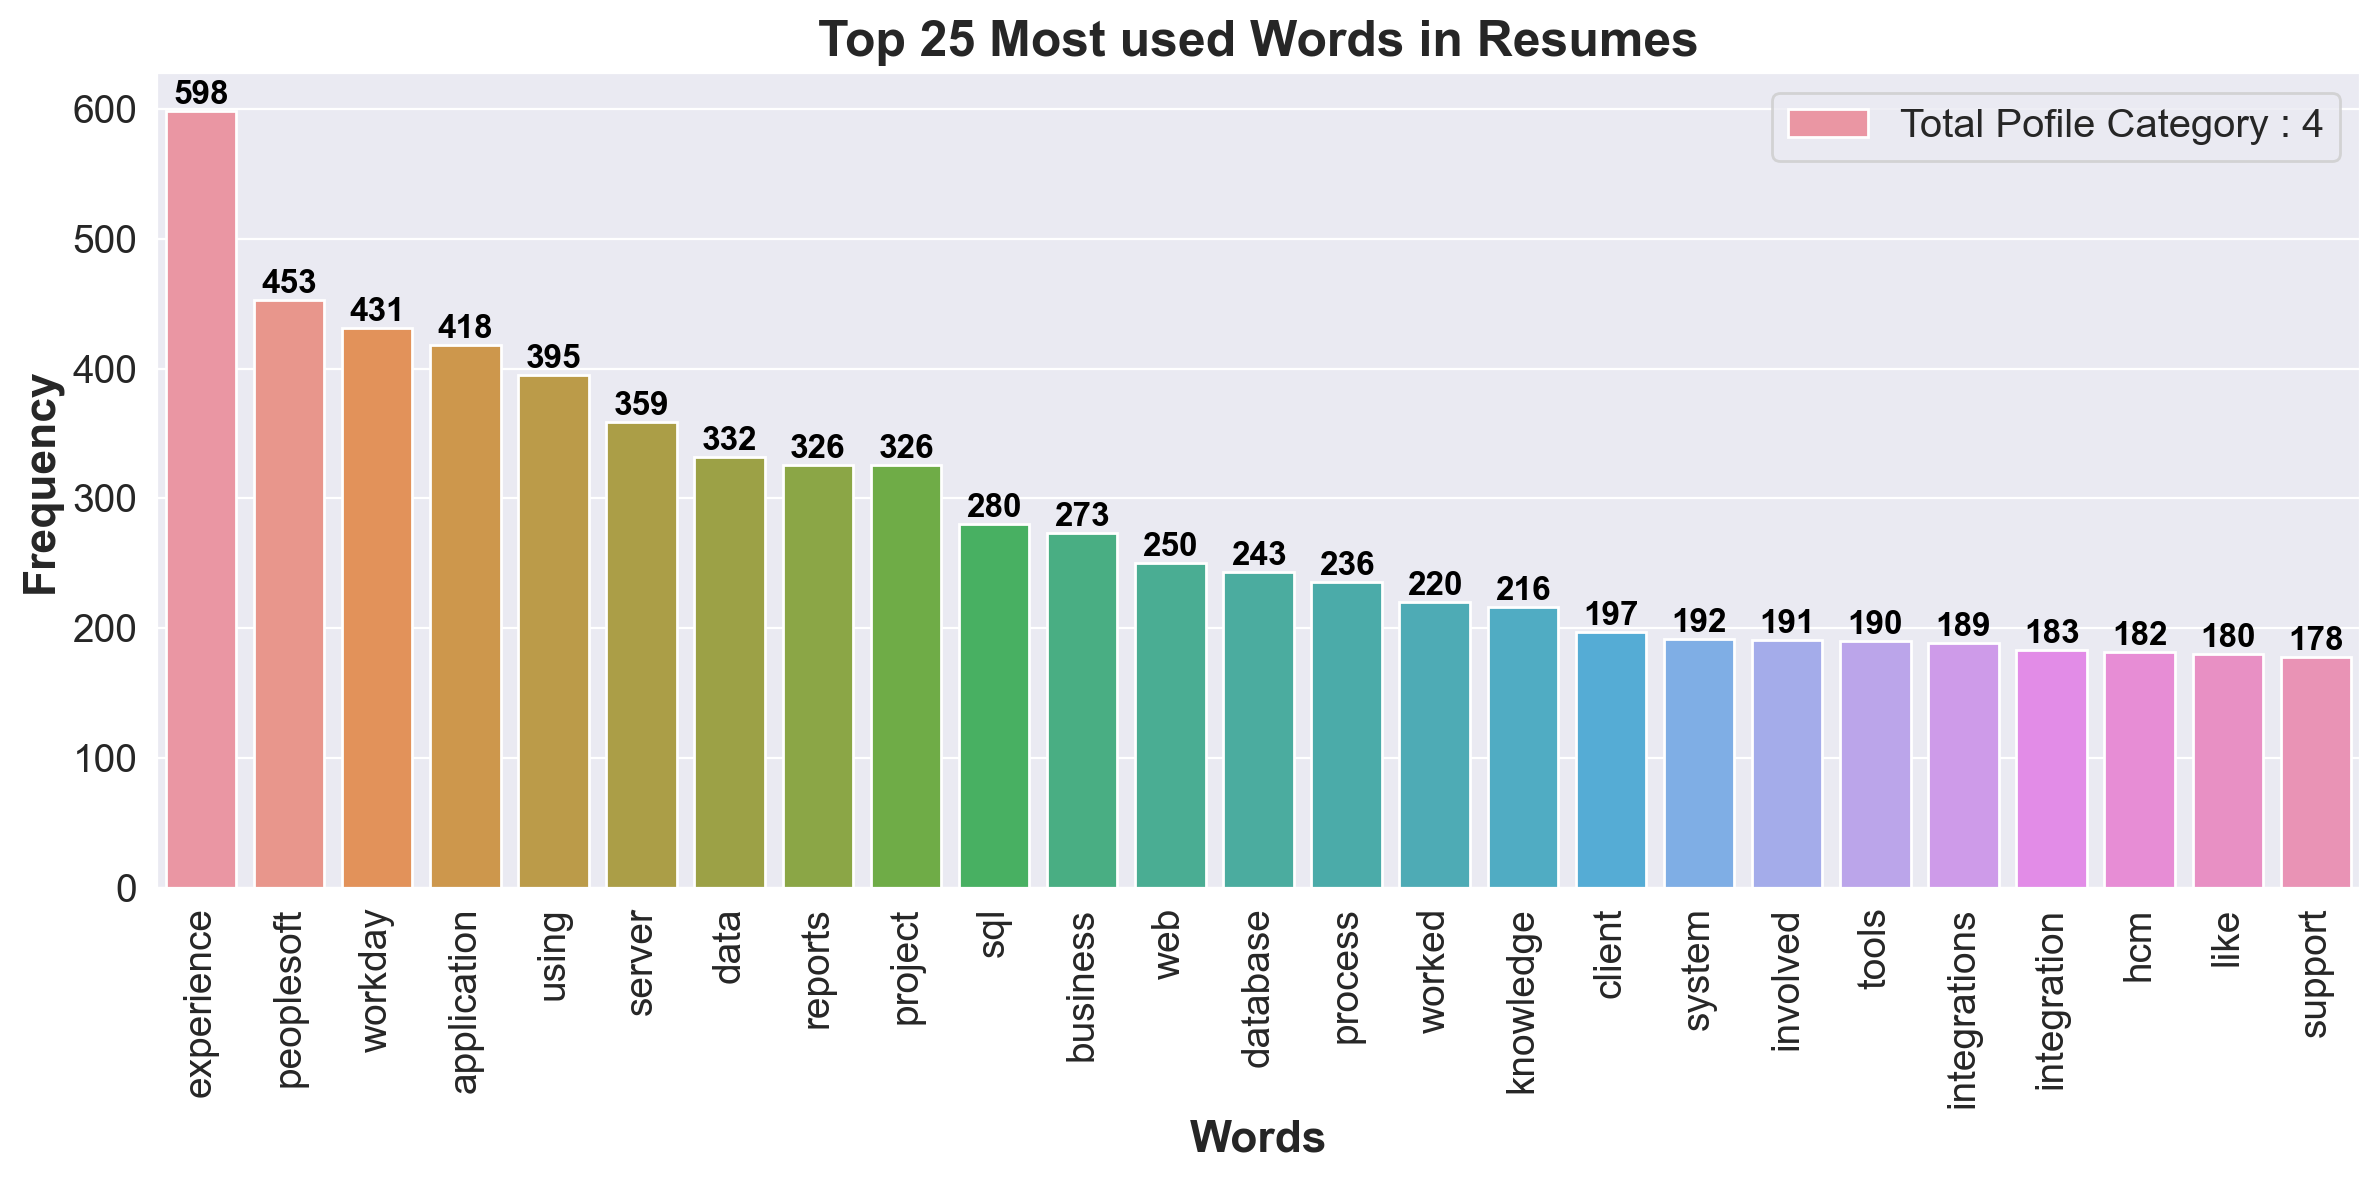

In [64]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Cat.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### Using the Word Clouds

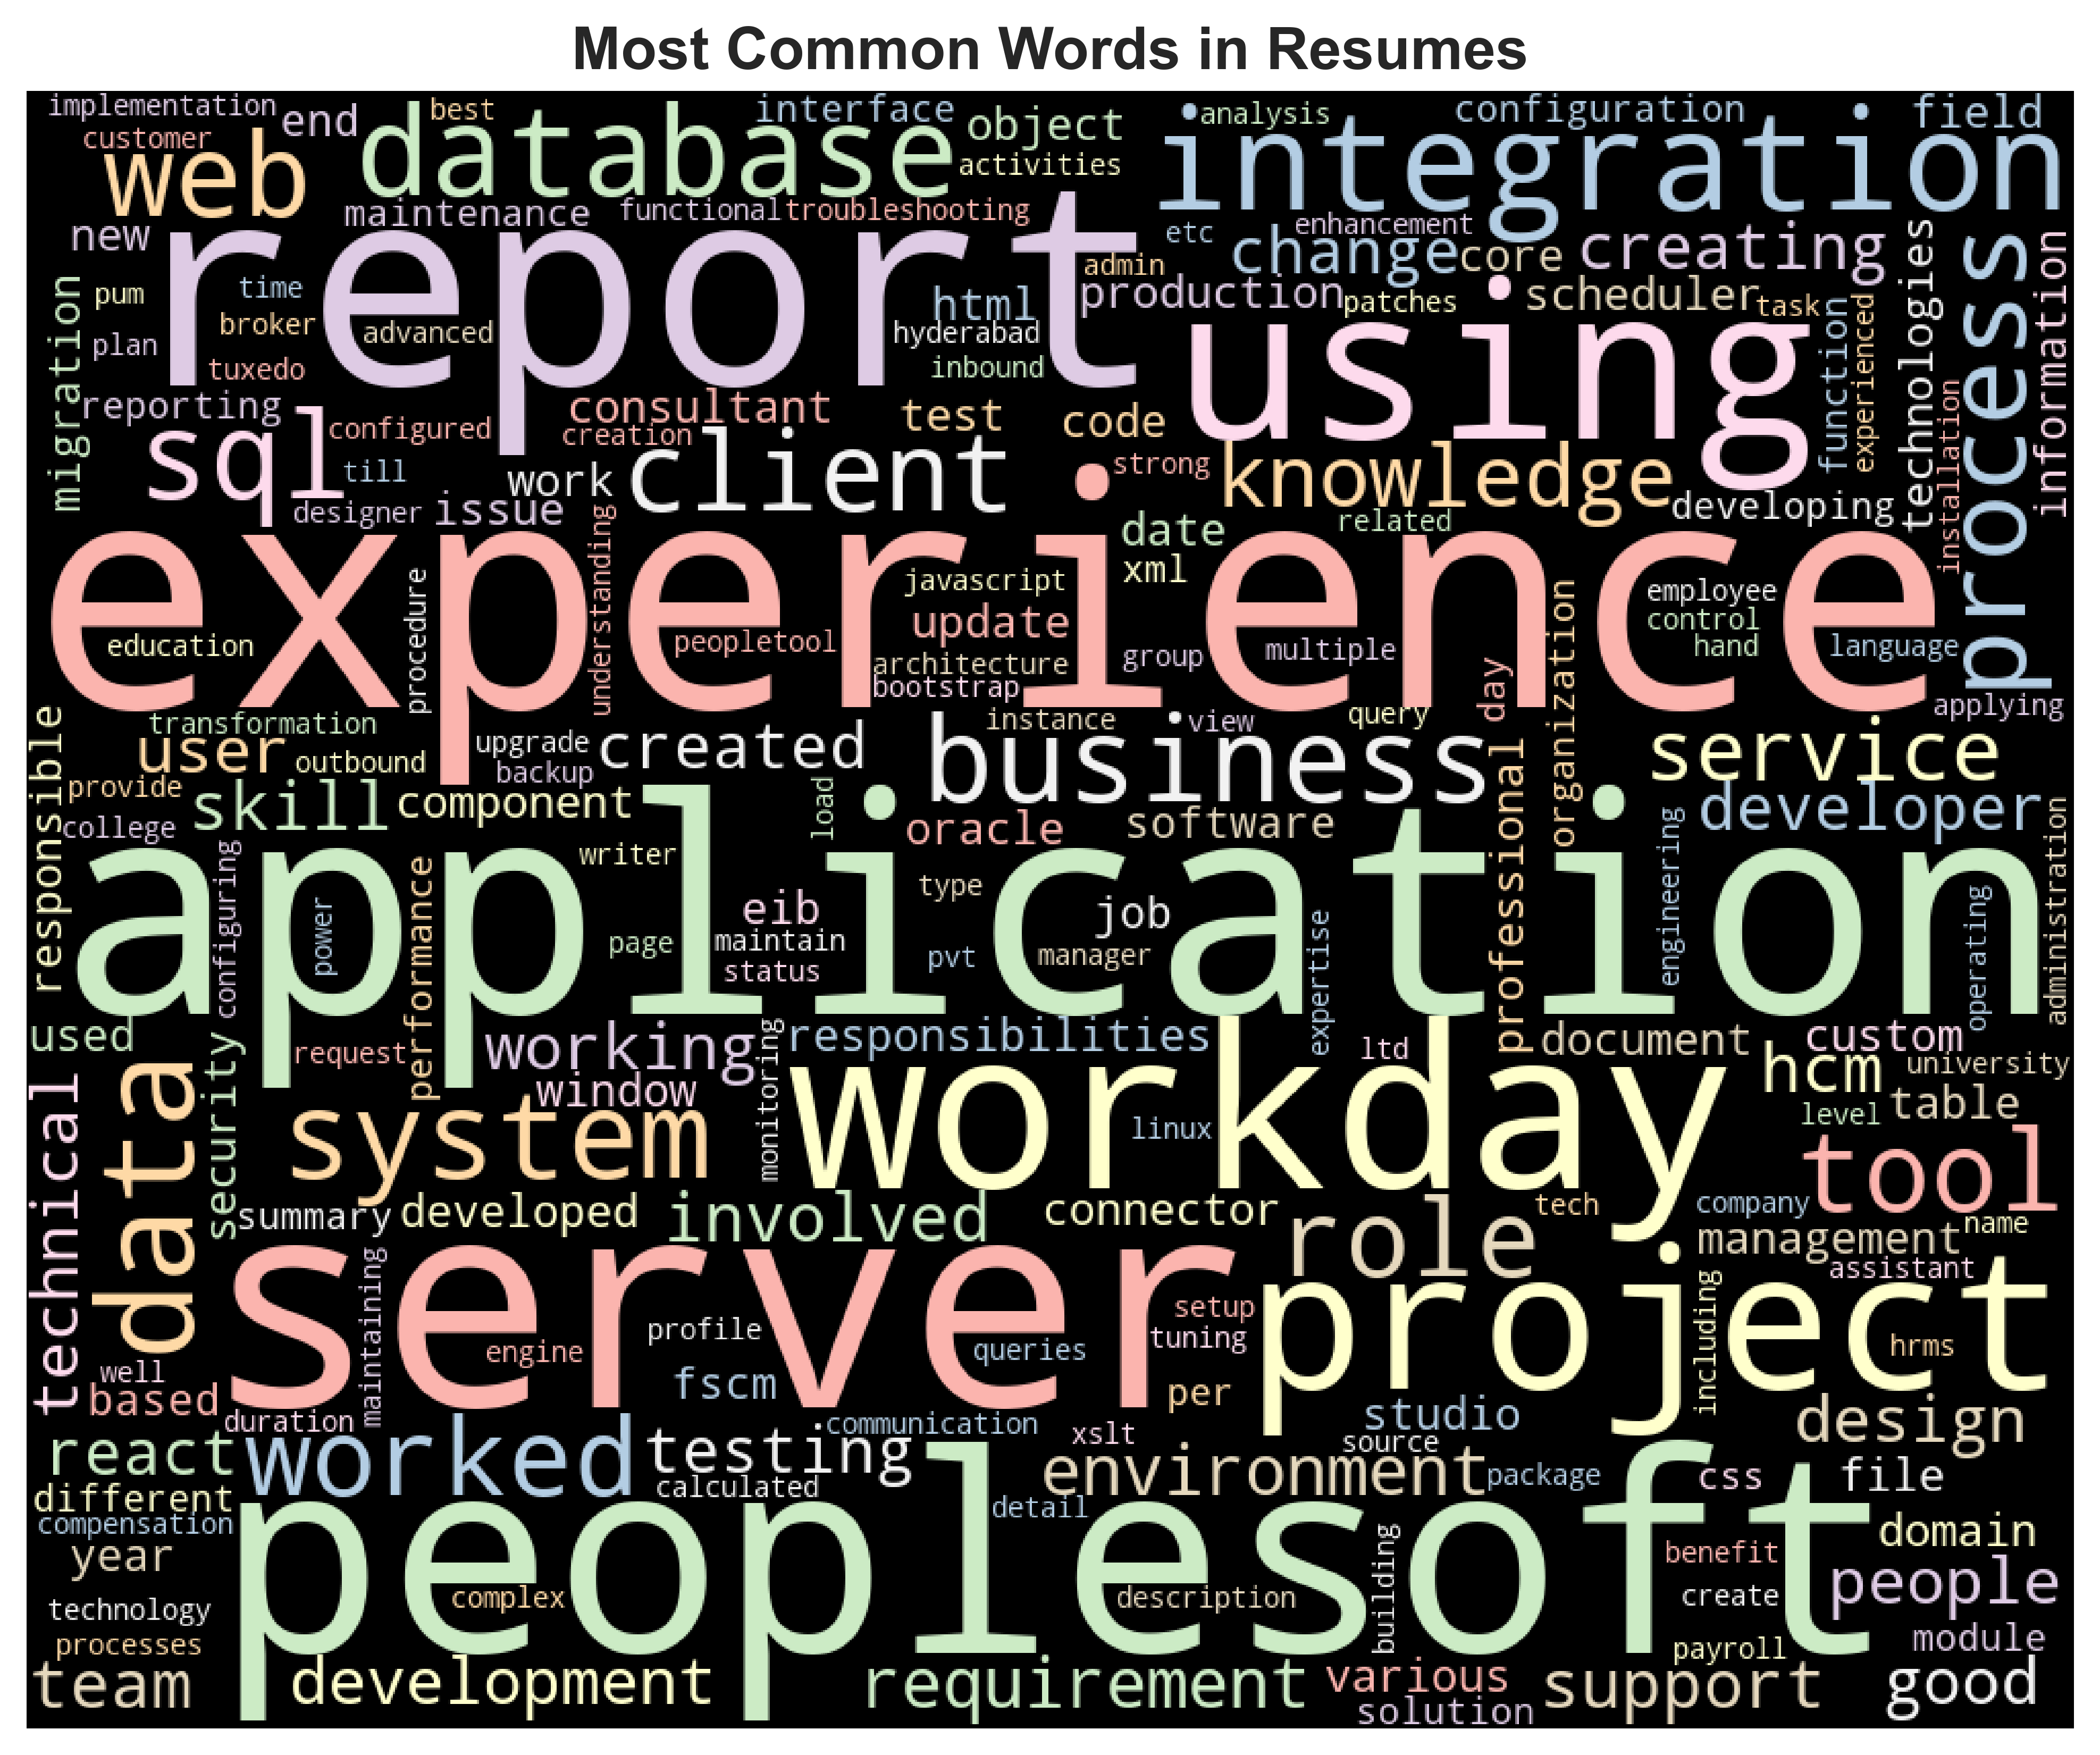

In [65]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [58]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Cat']
le = LabelEncoder()
for i in var_mod:
    resume_data[i] = le.fit_transform(resume_data[i])

In [33]:
resume_data

,Cat,Resume_Details
0,0,anubhav kumar singh core competencies scriptin...
1,0,ananda rayudu profile summary years experience...
2,0,peoplesoft database administrator gangareddy p...
3,0,classification internal classification interna...
4,0,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,1,khizaruddin rauf experience currently working ...
75,1,name prabakaran title developer professional s...
76,1,pranish sonone career summary experience years...
77,1,ranga gaganam professional summary professiona...


In [36]:
resume_data.Cat.value_counts()

1    24
3    21
0    20
2    14
Name: Cat, dtype: int64

In [37]:
targetCounts = resume_data['Cat'].value_counts().reset_index()['Cat']
targetLabels  = resume_data['Cat'].value_counts().reset_index()['index']

# TFIDF - Term frequency inverse Document Frequency

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [40]:
requiredText = resume_data['Resume_Details'].values
requiredTarget = resume_data['Cat'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=30, test_size=0.20, shuffle = True, stratify=requiredTarget)
X_train.shape, X_test.shape

((63, 4348), (16, 4348))

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# 1. RANDOM FOREST

In [50]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
prediction_1 = rf_clf.predict(X_test)
print('Accuracy of Decision Tree Classifier on training set: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set    : {:.4f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on training set: 1.0000
Accuracy of Decision Tree Classifier on test set    : 1.0000


In [53]:
print("\n Classification report for Decision Tree Classifier %s:\n%s\n" % (rf_clf, metrics.classification_report(y_test, prediction_1)))


 Classification report for Decision Tree Classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




In [54]:
accuracy_1 = round(accuracy_score(y_test,prediction_1),4)
precision_1 = round(precision_score(y_test,prediction_1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,prediction_1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,prediction_1, average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_scoreprint('Accuracy Score   : ', accuracy_1)
print('Precision Score  : ', precision_1)
print('Recall Score     : ', recall_1)
print('f1-Score         : ', f1_1)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_1))

Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0
Confusion Matrix :
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


# 2 SUPPORT VECTOR MACHINE

In [55]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
prediction_2 = sv_clf.predict(X_test)
print('Accuracy of Support Vector Classifier on training set: {:.4f}'.format(sv_clf.score(X_train, y_train)))
print('Accuracy of Support Vector Classifier on test set    : {:.4f}'.format(sv_clf.score(X_test, y_test)))

Accuracy of Support Vector Classifier on training set: 1.0000
Accuracy of Support Vector Classifier on test set    : 0.8750


In [56]:
print("\n Classification report for Support Vector Classifier %s:\n%s\n" % (sv_clf, metrics.classification_report(y_test, prediction_2)))


 Classification report for Support Vector Classifier SVC():
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.93      0.88      0.88        16
weighted avg       0.91      0.88      0.86        16




In [57]:
accuracy_2 = round(accuracy_score(y_test,prediction_2),4)
precision_2 = round(precision_score(y_test,prediction_2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,prediction_2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,prediction_2, average = 'macro'),4)

#Printing Accuracy, Recall, precision, F1_score
print('Accuracy Score   : ', accuracy_2)
print('Precision Score  : ', precision_2)
print('Recall Score     : ', recall_2)
print('f1-Score         : ', f1_2)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_2))

Accuracy Score   :  0.875
Precision Score  :  0.9286
Recall Score     :  0.875
f1-Score         :  0.875
Confusion Matrix :
 [[2 2 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


# 3 MULTINOMIAL NAVIE BAYES

In [59]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
prediction_3 = nb_clf.predict(X_test)
print('Accuracy of Multinomial NB Classifier on training set: {:.4f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy of Multinomial NB Classifier on test set    : {:.4f}'.format(nb_clf.score(X_test, y_test)))

Accuracy of Multinomial NB Classifier on training set: 1.0000
Accuracy of Multinomial NB Classifier on test set    : 0.8750


In [60]:
print("\n Classification report for Multinomial NB Classifier %s:\n%s\n" % (nb_clf, metrics.classification_report(y_test, prediction_3)))


 Classification report for Multinomial NB Classifier MultinomialNB():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         5
           2       1.00      0.67      0.80         3
           3       0.67      1.00      0.80         4

    accuracy                           0.88        16
   macro avg       0.92      0.85      0.86        16
weighted avg       0.92      0.88      0.88        16




In [61]:
accuracy_3 = round(accuracy_score(y_test,prediction_3),4)
precision_3 = round(precision_score(y_test,prediction_3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,prediction_3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,prediction_3, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_3))

Accuracy Score  :  0.875
Precision Score :  0.9167
Recall Score    :  0.8542
f1-Score        :  0.8643
Confusion Matrix:
 [[3 0 0 1]
 [0 5 0 0]
 [0 0 2 1]
 [0 0 0 4]]


# 4 LOGISTIC REGRESSION

In [62]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
prediction_4 = logistic_clf.predict(X_test)
print('Accuracy of Logistic Regression Classifier on training set: {:.4f}'.format(logistic_clf.score(X_train, y_train)))
print('Accuracy of Logistic Regression Classifier on test set    : {:.4f}'.format(logistic_clf.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on training set: 1.0000
Accuracy of Logistic Regression Classifier on test set    : 0.9375


In [63]:
print("\n Classification report for Logistic Regression Classifier %s:\n%s\n" % (logistic_clf, metrics.classification_report(y_test, prediction_4)))


 Classification report for Logistic Regression Classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16




In [64]:
accuracy_4 = round(accuracy_score(y_test,prediction_4),4)
precision_4 = round(precision_score(y_test,prediction_4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,prediction_4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,prediction_4, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_4))

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9375
f1-Score        :  0.9416
Confusion Matrix:
 [[3 1 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


# 5 AdaBoost Classifier

In [65]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
prediction_5 = ab_clf.predict(X_test)
print('Accuracy of AdaBoost Classifier on training set: {:.4f}'.format(ab_clf.score(X_train, y_train)))
print('Accuracy of AdaBoost Classifier on test set    : {:.4f}'.format(ab_clf.score(X_test, y_test)))

Accuracy of AdaBoost Classifier on training set: 1.0000
Accuracy of AdaBoost Classifier on test set    : 0.9375


In [66]:
print("\n Classification report for AdaBoost Classifier %s:\n%s\n" % (ab_clf, metrics.classification_report(y_test, prediction_5)))


 Classification report for AdaBoost Classifier AdaBoostClassifier():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16




In [67]:
accuracy_5 = round(accuracy_score(y_test,prediction_5),4)
precision_5 = round(precision_score(y_test,prediction_5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,prediction_5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,prediction_5, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_5))

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9375
f1-Score        :  0.9416
Confusion Matrix:
 [[3 1 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


# 6 GradientBoosting Classifier

In [68]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
prediction_6 = gb_clf.predict(X_test)
print('Accuracy of GradientBoosting Classifier on training set: {:.4f}'.format(gb_clf.score(X_train, y_train)))
print('Accuracy of GradientBoosting Classifier on test set    : {:.4f}'.format(gb_clf.score(X_test, y_test)))

Accuracy of GradientBoosting Classifier on training set: 1.0000
Accuracy of GradientBoosting Classifier on test set    : 0.9375


In [69]:
print("\n Classification report for GradientBoosting Classifier %s:\n%s\n" % (gb_clf, metrics.classification_report(y_test, prediction_6)))


 Classification report for GradientBoosting Classifier GradientBoostingClassifier():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16




In [70]:
accuracy_6 = round(accuracy_score(y_test,prediction_6),4)
precision_6 = round(precision_score(y_test,prediction_6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,prediction_6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,prediction_6, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_6))


Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9375
f1-Score        :  0.9416
Confusion Matrix:
 [[3 1 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


# 7 Xtreme Gradient Boosting Classifier

In [74]:
!pip install xgboost

from xgboost import XGBClassifier
import xgboost as xgb

In [75]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
prediction_7 = xgb_clf.predict(X_test)
print('Accuracy of XtremeGradientBoosting Classifier on training set: {:.4f}'.format(xgb_clf.score(X_train, y_train)))
print('Accuracy of XtremeGradientBoosting Classifier on test set    : {:.4f}'.format(xgb_clf.score(X_test, y_test)))

Accuracy of XtremeGradientBoosting Classifier on training set: 1.0000
Accuracy of XtremeGradientBoosting Classifier on test set    : 0.9375


In [76]:
print("\n Classification report for XtremeGradientBoosting Classifier %s:\n%s\n" % (xgb_clf, metrics.classification_report(y_test, prediction_7)))


 Classification report for XtremeGradientBoosting Classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...):
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2 

In [77]:
accuracy_7 = round(accuracy_score(y_test,prediction_7),4)
precision_7 = round(precision_score(y_test,prediction_7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,prediction_7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,prediction_7, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_7))


Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9375
f1-Score        :  0.9416
Confusion Matrix:
 [[3 1 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [80]:
table = {'Classifier' : ['Random Forest Classifier', 'SVM Classifier', 'Multinomial NB Classifier', 'Logistic Regression', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier'], 'Accuracy Score' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7], 'f1-Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7]}
table = pd.DataFrame(table)
table

,Classifier,Accuracy Score,Precision Score,Recall Score,f1-Score
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000
1,SVM Classifier,0.8750,0.9286,0.8750,0.8750
2,Multinomial NB Classifier,0.8750,0.9167,0.8542,0.8643
3,Logistic Regression,0.9375,0.9583,0.9375,0.9416
4,AdaBoost Classifier,0.9375,0.9583,0.9375,0.9416
5,Gradient Boosting Classifier,0.9375,0.9583,0.9375,0.9416
6,Xtreme Gradient Boosting Classifier,0.9375,0.9583,0.9375,0.9416
